REGRESIÓN

Imports necesarios

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector as SFFS
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Importaciones para la predicción (extra)
# ==============================================================================
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor


# Importaciones para la búsqueda de hiperparámetros
# ==============================================================================
from sklearn.model_selection import GridSearchCV

# Importaciones para la medida de calidad de la predicción
# ==============================================================================
from sklearn.model_selection import cross_val_score
import multiprocessing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Lectura de csv

Se debe cargar previamente los csv en 'Subir al almacenamiento de sesión' para que funncione en Google Colab y tenerlo en la misma carpeta que el ipynb para que funcione en Visual Studio.

In [3]:
train = pd.read_csv('train_ap1_mcp_23_24_train.csv')  #lectura de train
test = pd.read_csv('test_ap1_mcp_23_24_test.csv')      #lectura de test

In [4]:
train

,song_name,song_id,popularity,acousticness,danceability,song_duration_ms,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,I’ll Come Running (To Tie Your Shoe),782579,34,0.5350,0.584,218227,0.459,0.034200,0,0.1530,-14.127,0,0.0319,124.465,3,0.7650
1,Mohican,150969,47,0.3210,0.758,206600,0.503,0.000234,0,0.1210,-11.445,0,0.1600,120.027,3,0.4770
2,"Todo Quedó, Quedó (En Vivo) [feat. Nelsón Arri...",261974,25,0.1680,0.732,304970,0.824,0.000021,11,0.9420,-9.296,0,0.1170,102.002,3,0.8260
3,Be Glorified,360055,39,0.0726,0.553,307040,0.718,0.000003,8,0.1520,-6.385,0,0.0248,87.989,3,0.6770
4,Guilty Pleasure,745239,57,0.0032,0.641,204435,0.844,0.000000,9,0.1060,-5.758,0,0.0465,150.030,3,0.8340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Make Me Wanna,74370,62,0.0369,0.545,225067,0.818,0.000000,0,0.1010,-6.380,0,0.0541,109.019,2,0.6790
23996,Maui Battles - Score Demo,19552,41,0.2350,0.232,117733,0.587,0.918000,1,0.3950,-13.186,1,0.1010,81.943,3,0.1130
23997,6 Concerts transcrits en sextuor / 6e concert:...,549733,15,0.8900,0.624,248733,0.269,0.879000,8,0.1200,-20.798,1,0.0391,128.212,2,0.3820
23998,"Puccini: La bohème, Act 1: ""O soave fanciulla""...",884432,13,0.9780,0.196,248307,0.134,0.026100,5,0.1180,-13.981,1,0.0365,84.730,3,0.0386


Vemos que no haya valores nulos

In [5]:
train.isna().sum().sum()

0

In [6]:
test.isna().sum().sum()

0

Vemos que nos viene una columna song_id en el dataset, y aunque nos tiente usar esa como id vamos a ver que no haya fallos de ids repetidos y canciones duplicadas.

In [7]:
# Miramos que no haya  duplicadas
print(train['song_id'].is_unique)
print(train.duplicated().any())


False
False


In [8]:
print(test['song_id'].is_unique)
print(test.duplicated().any())

False
False


Observamos que aunque haya song_id repetidos, no hay filas duplicadas, por lo que creemos que hay canciones con el mismo song_id. Asi que hemos decidido borrar la columna song_id y quedarnos con el index que asigna pandas a cada fila, ya que no hay ninguna repetida.
Ademas, vamos a borrar song_name por su irrelevancia de cara a la popularidad

In [9]:
train.drop(columns=['song_id', 'song_name'],inplace=True)
test.drop(columns=['song_id', 'song_name'],inplace=True)

In [10]:
#Volvemos a ver si hay duplicados
print(train.duplicated().any())
print(test.duplicated().any())

True
True


In [11]:
#Los borramos
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [12]:
train

,popularity,acousticness,danceability,song_duration_ms,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,34,0.5350,0.584,218227,0.459,0.034200,0,0.153,-14.127,0,0.0319,124.465,3,0.7650
1,47,0.3210,0.758,206600,0.503,0.000234,0,0.121,-11.445,0,0.1600,120.027,3,0.4770
2,25,0.1680,0.732,304970,0.824,0.000021,11,0.942,-9.296,0,0.1170,102.002,3,0.8260
3,39,0.0726,0.553,307040,0.718,0.000003,8,0.152,-6.385,0,0.0248,87.989,3,0.6770
4,57,0.0032,0.641,204435,0.844,0.000000,9,0.106,-5.758,0,0.0465,150.030,3,0.8340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,31,0.8160,0.730,244613,0.626,0.795000,10,0.123,-11.021,1,0.0299,115.954,3,0.7570
23995,62,0.0369,0.545,225067,0.818,0.000000,0,0.101,-6.380,0,0.0541,109.019,2,0.6790
23996,41,0.2350,0.232,117733,0.587,0.918000,1,0.395,-13.186,1,0.1010,81.943,3,0.1130
23997,15,0.8900,0.624,248733,0.269,0.879000,8,0.120,-20.798,1,0.0391,128.212,2,0.3820


Vemos que tipo de datos tenemos

In [13]:
train.dtypes

popularity            int64
acousticness        float64
danceability        float64
song_duration_ms      int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

Visualizamos la correlación de la popularidad con cada una de las columnas para ver si tienen alguna relación


In [14]:
visualcorr=pd.DataFrame(index=train.corr().index,columns=train.corr().columns)
for i in train.corr().columns:
  for j in train.corr().index:
    if abs(train.corr()[i][j])>0.5 and abs(train.corr()[i][j])!=1:  #seleccionamos solo las que sean mayor que 0.5 y diferente a 1
      visualcorr[i][j]=train.corr()[i][j]   # se devuelve su valor
    else:
      visualcorr[i][j]=0  # las que no lo cumplen son 0
visualcorr

,popularity,acousticness,danceability,song_duration_ms,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
popularity,0,0,0,0,0,0,0,0,0,0,0,0,0,0
acousticness,0,0,0,0,-0.727525,0,0,0,-0.686973,0,0,0,0,0
danceability,0,0,0,0,0,0,0,0,0,0,0,0,0,0.55425
song_duration_ms,0,0,0,0,0,0,0,0,0,0,0,0,0,0
energy,0,-0.727525,0,0,0,0,0,0,0.816218,0,0,0,0,0
instrumentalness,0,0,0,0,0,0,0,0,-0.504432,0,0,0,0,0
key,0,0,0,0,0,0,0,0,0,0,0,0,0,0
liveness,0,0,0,0,0,0,0,0,0,0,0.523957,0,0,0
loudness,0,-0.686973,0,0,0.816218,-0.504432,0,0,0,0,0,0,0,0
audio_mode,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Vemos que ninguna tiene mayor relacion mayor que 0.5 con popularity. Hemos resaltado aquellas que tienen una correlacion mayor que 0.5 para resumirlo, pero como el objetivo principal es conseguir una visualizacion mejor respecto a la popularidad de las canciones, no vamos a profundizar mas en este analisis.

Comprobamos puntos atípicos

<Axes: >

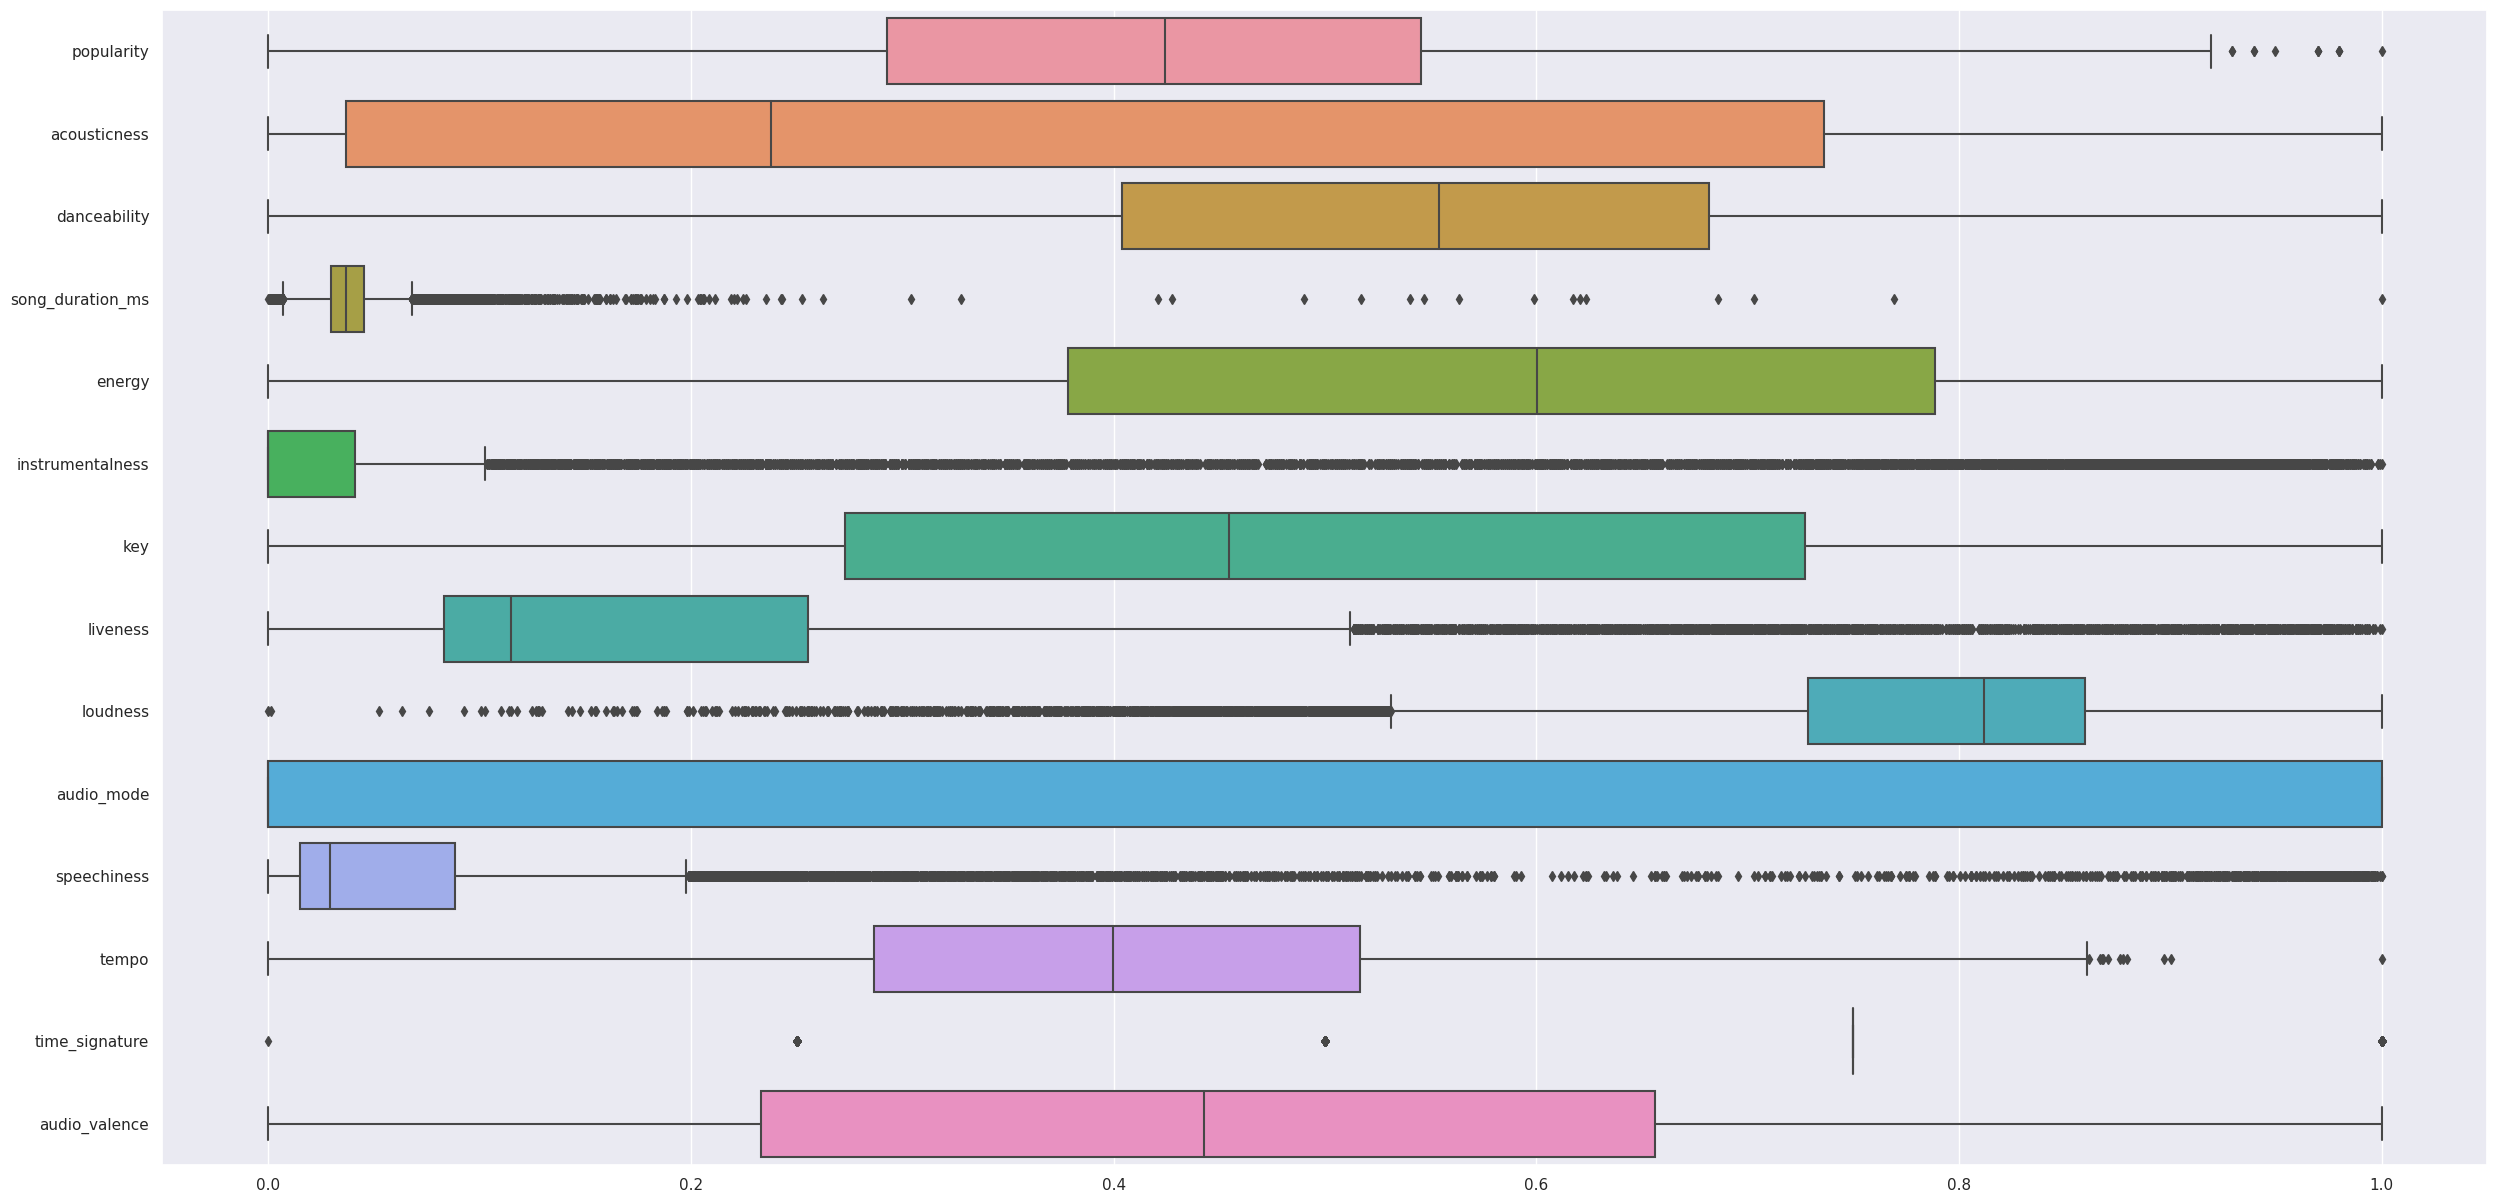

In [15]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Normalizamos el dataset para tener todo a escala para una mejor visualización

scaler = MinMaxScaler()
data_train_n = scaler.fit_transform(train) # Normalizamos los datos para que sean más comparables
data_train_n = pd.DataFrame(data_train_n, columns = train.columns, index = train.index)

# Visualización de los valores atípicos mediante el diagrama de cajas y bigotes de todas las columnas

sns.set(rc={'figure.figsize':(30,15)})
sns.boxplot(data = data_train_n, orient = 'h')

Los puntos atípicos son tantos que si los borramos podríamos tener overfitting.

Creamos x e y train y los dividimos en conjunto de entrenamiento y test, ya que estos son los datos que tienen valor de popularity y con los que vamos a entrenar y evaluar nuestros modelos.

In [16]:
# Sin normalizar y con outliers

X_train = train.drop('popularity', axis = 1)
y_train = train['popularity'].to_numpy()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Métodos de predicción

Comenzamos aplicando los métodos de regresión vistos en clase.

##Regresión Lineal

Utilizamos n_jobs=-1 para utilizar todo los procesadores y acelerar el proceso, aunque se podria no poner.

In [18]:
# Creamos y entrenamos un modelo de regresión lineal simple utilizando el conjunto de entrenamiento (X_train, y_train)
Simple_model = LinearRegression(n_jobs=-1).fit(X_train, y_train)

r2_r1 = r2_score(y_test, Simple_model.predict(X_test))
mae_r1 = mean_absolute_error(y_test, Simple_model.predict(X_test))
print(r2_r1)
print(mae_r1)

0.21943360085854313
12.774210444508299


Vemos que el resultado no es bueno. Aun asi vamos a representar la relacion de los coeficientes del modelo con nuestras caracteristicas y asi ver la correlacion con popularity:

In [19]:
pd.DataFrame(data=np.expand_dims(Simple_model.coef_, axis=0), columns=X_train.columns)

,acousticness,danceability,song_duration_ms,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,-11.505747,17.597274,0.000001,-4.424874,-4.696541,0.008775,-9.916794,0.612401,1.610044,-7.991624,-0.001311,1.32866,-13.850362


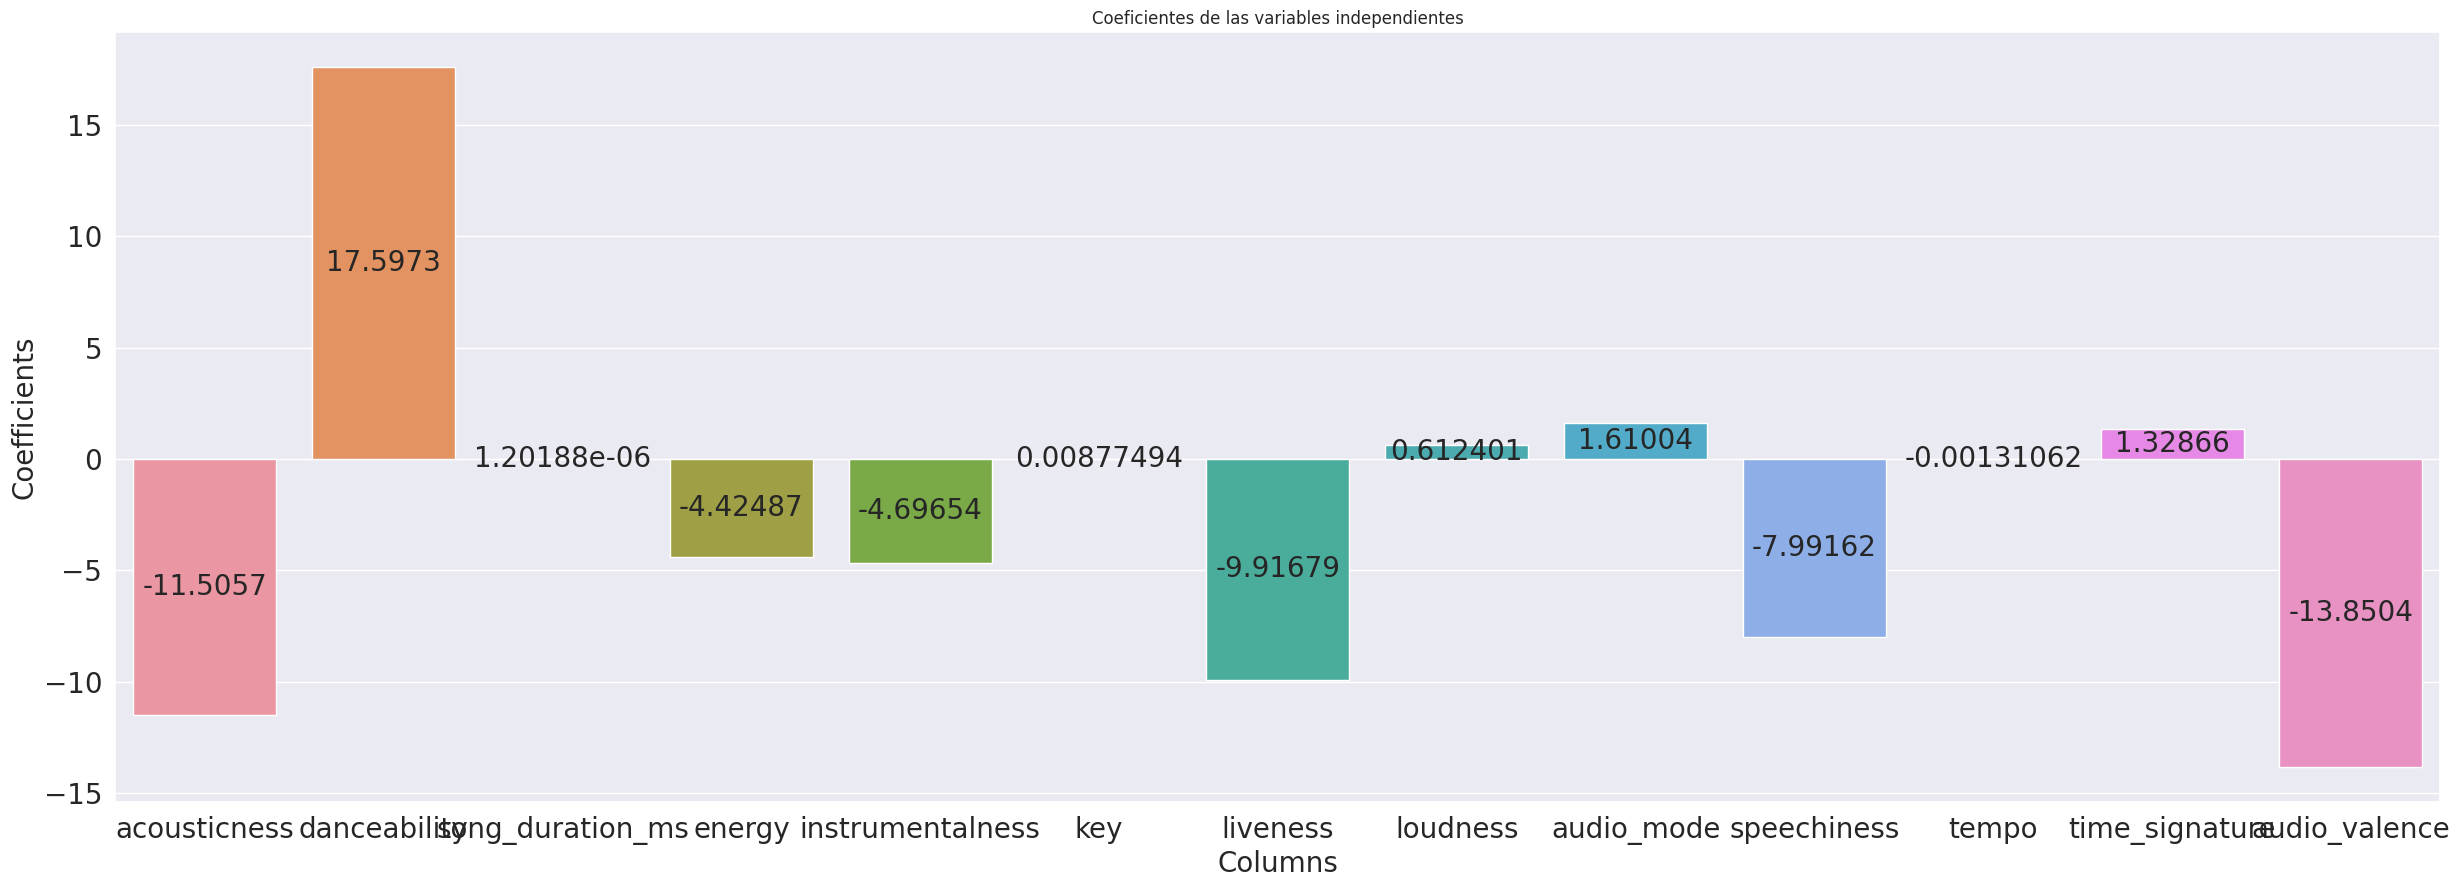

In [20]:
column_names = X_train.columns
column_coef = pd.DataFrame({"columns" : column_names,
             "coef_": Simple_model.coef_})

plt.figure(figsize = (30,10))
ax = sns.barplot(data = column_coef, x = "columns", y = "coef_")

plt.bar_label(ax.containers[0],size=20,label_type="center")

plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Columns",size = 20)
plt.ylabel("Coefficients",size = 20)
plt.title("Coeficientes de las variables independientes")
plt.show()

Se puede apreciar que danceability tiene un buen grado de correlacion, lo cual se podria decir que a mayor danceability mayor popularidad. Al contrario pasa con acousticness, liveness, speechiness y audio_valence, que tienen una mayor correlacion inversa.
Ademas podemos observar que tanto song_duration, key y tempo apenas muestran aportacion a la popularidad, algo que tiene sentido pensar en un primer momento.

A paritr de ahora utilizaremos para los siguientes modelos un grid search con un espacio de busqueda de diferentes valores para sus parametros y asi obtener el mejor resultado mediante la validacion cruzada del valor de r2 score, además de calcular su mae para tener ambas medidas.

Lasso

In [21]:
#Posibles valores de los parametros que se tendran en cuenta
parameters = {"alpha":np.arange(0.01,2,0.05)}

#Definimos el Grid Search
ComplexLModel = GridSearchCV(Lasso(), parameters, scoring = "r2", n_jobs=-1, verbose=0)

#Entrenamos y devolvemos el mejor valor para los parametros
ComplexLModel.fit(X_train,y_train)
ComplexLModel.best_params_

{'alpha': 0.01}

In [22]:
#Utilizamos como parametro el valor que nos ha devuelto el modelo como el mejor y entrenamos el modelo con este valor
ComplexLModel = Lasso(alpha=0.01)

ComplexLModel.fit(X_train, y_train)

#Calculamos tanto el r2 score como el mae
r2_r2 = r2_score(y_test, ComplexLModel.predict(X_test))
mae_r2 = mean_absolute_error(y_test, ComplexLModel.predict(X_test))
print(r2_r2)
print(mae_r2)

0.21958086328161186
12.77748717448625


Sigue siendo mal resultado y apenas se mejora.

Ridge

In [23]:
#Posibles valores de los parametros que se tendran en cuenta
parameters = {"alpha":np.arange(0.25,10,0.05)}

#Definimos el Grid Search
ComplexLModel = GridSearchCV(Ridge(), parameters, scoring = "r2", n_jobs=-1, verbose=0)

#Entrenamos y devolvemos el mejor valor para los parametros
ComplexLModel.fit(X_train,y_train)
ComplexLModel.best_params_

{'alpha': 1.5999999999999996}

In [24]:
#Utilizamos como parametro el valor que nos ha devuelto el modelo como el mejor y entrenamos el modelo con este valor
ComplexLModel = Ridge(alpha=1.59)

ComplexLModel.fit(X_train, y_train)

#Calculamos tanto el r2 score como el mae
r2_r2 = r2_score(y_test, ComplexLModel.predict(X_test))
mae_r2 = mean_absolute_error(y_test, ComplexLModel.predict(X_test))
print(r2_r2)
print(mae_r2)

0.21945873190025023
12.774332489492068


No mejora. Hemos intentado cambiar el rango de los distintos valores que puede utilizar el grid search y esto ha sido lo que mejor resultado ha dado, aunque siga sin mejorar.

ElasticNet

In [25]:
#Posibles valores de los parametros que se tendran en cuenta
parameters = {"alpha":np.arange(0.25,10,0.5), "l1_ratio": np.arange(0,1.05,0.05)}

#Definimos el Grid Search
ComplexLModel = GridSearchCV(ElasticNet(), parameters, scoring = "r2", n_jobs=-1, verbose=0)

#Entrenamos y devolvemos el mejor valor para los parametros
ComplexLModel.fit(X_train,y_train)
ComplexLModel.best_params_

{'alpha': 0.25, 'l1_ratio': 1.0}

In [26]:
#Utilizamos como parametro el valor que nos ha devuelto el modelo como el mejor y entrenamos el modelo con este valor
ComplexLModel = ElasticNet(alpha=0.25, l1_ratio=1)

ComplexLModel.fit(X_train, y_train)

#Calculamos tanto el r2 score como el mae
r2_r2 = r2_score(y_test, ComplexLModel.predict(X_test))
mae_r2 = mean_absolute_error(y_test, ComplexLModel.predict(X_test))
print(r2_r2)
print(mae_r2)

0.18931353405318196
13.14923901756396


Otro mal resultado, incluso peor que el anterior.

##Regresión Polinómica

In [27]:
#Volvemos a traernos todos los datos para hacerles la transformacion
X = train.drop('popularity', axis = 1)
y = train['popularity'].to_numpy()

Hemos intentado hacer un bucle for que probase la transformacion del polinomio con distintos grados para ver cual era el mejor, pero no hemos podido ejecutarlo en colab porque consumia toda la RAM y no se ejecutaba. Por tanto vamos a probar con los grados mas comunes, 2 y 3, y los modelos Linear Regression y ElasticNet.

Primero empezamos con Linear Regression

Grado del polinomio: 3

In [28]:
Poli = PolynomialFeatures(degree=3).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Poli, y, test_size=0.2, random_state=101)

linear_p = LinearRegression()
linear_p.fit(X_train, y_train)

#Calculamos tanto el r2 score como el mae
r2_pr1 = r2_score(y_test, linear_p.predict(X_test))
mae_pr1 = mean_absolute_error(y_test, linear_p.predict(X_test))
print(r2_pr1)
print(mae_pr1)

-0.5894690275682029
12.513838854319058


Grado del polinomio: 2

In [29]:
Poli = PolynomialFeatures(degree=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Poli, y, test_size=0.2, random_state=101)

linear_p = LinearRegression()
linear_p.fit(X_train, y_train)

#Calculamos tanto el r2 score como el mae
r2_pr1 = r2_score(y_test, linear_p.predict(X_test))
mae_pr1 = mean_absolute_error(y_test, linear_p.predict(X_test))
print(r2_pr1)
print(mae_pr1)

0.29912762233143164
12.061863784900025


Mejora bastante respecto al polinomio de grado 3.

Despues probamos con ElasticNet, para el cual haremos un grid search para estimar los mejores parametros con un polinomio de grado 3.

In [30]:
Poli = PolynomialFeatures(degree=3).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Poli, y, test_size=0.2, random_state=101)

#Posibles valores de los parametros que se tendran en cuenta
parameters = {"alpha":np.arange(0.25,4.25,1), "l1_ratio": np.arange(0,1.01,0.1)}

#Definimos el Grid Search
SimplePModel2 = GridSearchCV(ElasticNet(), parameters, scoring = "r2", n_jobs=-1, cv =3,  verbose=5)

#entrenamos el modelo
SimplePModel2.fit(X_train, y_train)

#Devolvemos el mejor valor para los parametros
print(SimplePModel2.best_params_)
print(SimplePModel2.best_score_)

Fitting 3 folds for each of 44 candidates, totalling 132 fits
{'alpha': 0.25, 'l1_ratio': 0.0}
0.26535755443959336


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.097e+06, tolerance: 6.111e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


No es mal resultado comparado con los anteriores, aunque es peor que el anterior.
Ahora probamos a definir un modelo con los mejores parametros que ha obtenido.

In [35]:
Poli = PolynomialFeatures(degree=3).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Poli, y, test_size=0.2, random_state=101)


#Utilizamos como parametro el valor que nos ha devuelto el modelo como el mejor y entrenamos el modelo con este valor
SimplePModel2 = ElasticNet(alpha=0.25, l1_ratio=0.0)
SimplePModel2.fit(X_train, y_train)

#Calculamos tanto el r2 score como el mae
r2_pr1 = r2_score(y_test, SimplePModel2.predict(X_test))
mae_pr1 = mean_absolute_error(y_test, SimplePModel2.predict(X_test))
print(r2_pr1)
print(mae_pr1)

-0.15275145066793394
12.116869977325893


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.097e+06, tolerance: 6.111e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Bastante peor que antes, veamos que pasa si utilizamos un polinomio de grado 2.

In [38]:
Poli = PolynomialFeatures(degree=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Poli, y, test_size=0.2, random_state=101)

#Posibles valores de los parametros que se tendran en cuenta
parameters = {"alpha":np.arange(0.25,4.25,1), "l1_ratio": np.arange(0,1.01,0.1)}

#Definimos el Grid Search
SimplePModel2 = GridSearchCV(ElasticNet(), parameters, scoring = "r2", n_jobs=-1, cv =3,  verbose=5)

#entrenamos el modelo
SimplePModel2.fit(X_train, y_train)

#Devolvemos el mejor valor para los parametros
print(SimplePModel2.best_params_)
print(SimplePModel2.best_score_)

Fitting 3 folds for each of 44 candidates, totalling 132 fits
{'alpha': 0.25, 'l1_ratio': 0.0}
0.25516992047228465


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.270e+06, tolerance: 6.111e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [39]:
Poli = PolynomialFeatures(degree=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Poli, y, test_size=0.2, random_state=101)

#Utilizamos como parametro el valor que nos ha devuelto el modelo como el mejor y entrenamos el modelo con este valor
SimplePModel3 = ElasticNet(alpha=0.25, l1_ratio=0.0)
SimplePModel3.fit(X_train, y_train)

#Calculamos tanto el r2 score como el mae
r2_pr1 = r2_score(y_test, SimplePModel3.predict(X_test))
mae_pr1 = mean_absolute_error(y_test, SimplePModel3.predict(X_test))
print(r2_pr1)
print(mae_pr1)

0.2588790553996395
12.496761868106828


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.270e+06, tolerance: 6.111e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Por tanto, podemos concluir que el mejor modelo hasta ahora es el de regresión polinómica con grado 2, aplicando una regresión lineal a la transformación.

##SGD

In [40]:
# Definir el modelo SGDRegressor
sgd_regressor = SGDRegressor()

# Definir los parámetros a probar en el Grid Search
param_grid = {'max_iter': np.arange(10,2000,50)}

# Configurar el Grid Search con validación cruzada (cv=5)
grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, scoring='r2', cv=5)

# Realizar el Grid Search con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor valor del parámetro max_iter
grid_search.best_params_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

{'max_iter': 160}

In [41]:
# Entrenar el modelo con el mejor valor de max_iter utilizando todos los datos de entrenamiento
final_model = SGDRegressor(max_iter=1110)
final_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = final_model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio en el conjunto de prueba: {mae}")
print(f"R2 score: {r2score}")

# Validación cruzada
en_score = cross_val_score(final_model, X_train, y_train, cv=None, scoring='r2')
en_score.mean()

Error absoluto medio en el conjunto de prueba: 1.1883236893562238e+30
R2 score: -1.9561110239190795e+59


-2.647959527843319e+60

Vemos que tanto el r2 como el mae son muy malos, los peores de momento.

Probamos con muchas menos iteraciones, las suficientes para que converja.

In [42]:
reg = SGDRegressor(max_iter=100, random_state=43)
reg.fit(X_train,y_train)

SGDRegressor(max_iter=100, random_state=43)

In [43]:
# Realizar predicciones en el conjunto de prueba
y_pred = reg.predict(X_test)

r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio en el conjunto de prueba: {mae}")
print(f"R2 score: {r2score}")

# Validación cruzada

en_score = cross_val_score(reg, X_train, y_train, cv=None, scoring='r2')
en_score.mean()

Error absoluto medio en el conjunto de prueba: 3.670660038972879e+29
R2 score: -1.8606545360920438e+58


-7.216129469785594e+61

Nos sigue saliendo un r2 y mae muy malos. Hay que tener en cuenta que el SGD Regressor esta centrado a solucionar el problema de la escalabilidad de la regreion linear, y en nuestro caso no tendria mucho sentido usarlo ya que no disponemos de muchos datos.

El resto de modelos dan resultados parecidos. El mejor resultado se obtiene con progresión polinómica por lo que usaremos este modelo para la prediccion de la popularidad de las canciones del dataset test. Aún así, los resultados no son elevados y estando tan alejados de 1 que no parece haber gran relación entre la popularidad y las demás características.

Predicción final, con el mejor modelo:

In [44]:
test

,acousticness,danceability,song_duration_ms,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.82900,0.625,203667,0.324,0.960000,3,0.1150,-10.729,0,0.0287,123.055,3,0.0694
1,0.99500,0.174,246773,0.249,0.711000,6,0.0621,-11.343,0,0.0363,71.169,3,0.1560
2,0.00388,0.614,200008,0.863,0.001560,2,0.2300,-6.096,1,0.0763,149.913,3,0.3120
3,0.91100,0.437,257173,0.232,0.000000,3,0.9740,-23.147,0,0.2980,89.836,3,0.3500
4,0.65700,0.701,239027,0.750,0.000003,8,0.0845,-3.191,1,0.2740,82.531,3,0.5150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.38800,0.585,193973,0.685,0.000000,4,0.1100,-6.490,1,0.0502,145.983,3,0.4600
5996,0.05100,0.608,202887,0.736,0.000000,9,0.2150,-6.700,0,0.1650,97.038,3,0.4890
5997,0.48400,0.666,102347,0.280,0.000000,10,0.1530,-14.667,0,0.8520,97.969,2,0.4880
5998,0.09320,0.772,282000,0.761,0.000002,3,0.0450,-7.170,0,0.0274,119.991,3,0.7730


In [45]:
#Hacemos la predicción con test
poly_X = PolynomialFeatures(degree=2).fit_transform(test)
y_pred = linear_p.predict(poly_X)


In [46]:
# Guardamos los resultados del test en un df

resultados = pd.DataFrame(index = test.index)
resultados['song_popularity'] = y_pred

# Mandamos los resultos a un csv

resultados.to_csv('prediccion_test.csv')

# Comprobación

resultados

,song_popularity
0,38.450648
1,28.421350
2,47.137326
3,14.955726
4,51.049219
...,...
5995,50.965363
5996,49.686077
5997,29.155985
5998,45.331310


Como se ha podido observar durante todo el análisis, no hay ningún modelo que haga una buena predicción. Por tanto se entiende que las predicciones que hemos realizado no serán muy acertadas.